# Game Success Analysis

## Introduction

The purpose of this project is to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns. We need to analyze the data based on sales, platform, genre, reviews and ratings. We would also need to form hypotheses to prove if the distribution among certain platforms and certain genres are similar.

### Contents

- Introduction
- Initialization
- Data preprocessing
    - Missing values
    - Correct data types
    - Enrich data
- Data exploration
    - Plot graphs
    - Plot boxplot
    - Plot scatterplot graphs
    - User profiles for regions
- Testing the hypotheses
    - The average user ratings of the Xbox One and PC platforms are the same
    - The average user ratings for the Action and Sports genres are different
- General Conclusion

# Initialization

Loading all essential libraries

In [1]:
# loading the pandas library
import pandas as pd
# loading the math library
import math
# Loading matplotlib library
import matplotlib.pyplot as plt
# loading the numpy library
import numpy as np
# Loading the scipy library
from scipy import stats as st

Loading the data file

In [2]:
# Load the data file into a DataFrame
games_data = pd.read_csv('/datasets/games.csv')

## Data Preprocessing

General information for the dataframe

In [3]:
# general info
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Lowering the cases of column name to avoid mistakes

In [4]:
# lower cases of column names
games_data.columns = games_data.columns.str.lower()

In [5]:
# check result
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# sample data
games_data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
122,FIFA 12,PS3,2011.0,Sports,0.84,4.3,0.11,1.39,NaN,NaN,NaN


### Missing Values

We need to check for missing values in the dataframe before analysis

In [7]:
# count missing values in the dataframe
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

There are only 2 missing values in the `'name'` and `'genre'` columns. Let us take a look at these values.

In [8]:
# missing values in name column
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


From what we see, the missing information is linked to the GEN platform with 1993 as its release year. It is understandable that information on the game and its genre would most likely be unknown or just not recorded. Notice how the reviews and rating are also not recorded. Since there are so few NaN values, these rows can be dropped.

In [9]:
# drop rows with NaN values in the name column
games_data.dropna(subset = ['name'], inplace = True)

In [10]:
# reset dataframe index
games_data.reset_index(drop = True, inplace = True)

In [11]:
# percent of missing data
games_data.isna().sum() / len(games_data) * 100

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64

The data above shows that about 1.6% percent of the dataframe is missing release year information. This could be omitted data or information  not recorded. We can also drop these NaN values

In [12]:
# drop NaN rows in column
games_data.dropna(subset = ['year_of_release'], inplace = True)

In [13]:
# reset index
games_data.reset_index(drop = True, inplace = True)

In [14]:
# check result
games_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Missing values in the last 3 columns above account for over 40% of the dataframe and would need to be filled in order to not affect consequent analysis. These columns are for critic and user reviews as well as game ratings. It is possible no data was found for these columns, especialy the columns for reviews as the information was never populated given the possibility that individuals lacked the interest to review the games. As for rating, there could have been multiple ratings or a general rating for the games such that no information was thought to be needed.

To fill in the missing values of the `'critic_score'` column, let's take a closer look at the statistics of the column

In [15]:
# decribe critic score column
games_data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

From what we see above, the values for mean and median are similar, but the standard deviation value is also high spectrum indicating the difference between the column values and the mean.

To gain more insight, we can see the boxplot below for the column

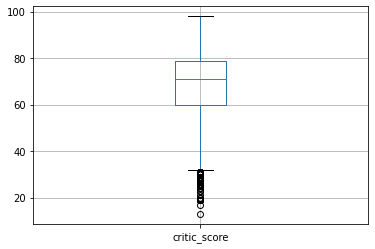

In [16]:
# boxplot of critic score column
games_data.boxplot(column = 'critic_score')
plt.show()

There are obvious outliers on both the upper and lower whiskers in the plot, predominantly the latter, which would most definitely affect the mean value. It is therefore logical to replace the missing values in the column with the median instead.

We can fill missing values in `'critic_score'`column with its median value based on the genre of games. We want to avoid using game sales information so as not to inadvertently influence the data.

In [17]:
#function to fill missing values based on columns
games_data['critic_score'] = games_data.groupby(['genre'])['critic_score'].transform(lambda x: x.fillna(x.median()))

In [18]:
# check if filled
games_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

Now, we move on to the `'user_score'`column

In [19]:
# unique values in user_score
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

As seen above, there are nan values as well as rows with 'tbd' populated. This implies that data for the column is to be expected but not available currently. We can also use 'tbd' to fill the missing values so that all that information is compiled under one label.

In [20]:
#function to fill missing values based on columns
games_data['user_score'].fillna('tbd', inplace = True)

In [21]:
# check if filled
games_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Lastly, we handle missing values in the `'rating'` column

In [22]:
# unique values in column
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Since ratings typically differ for indivdual games in each genre, we can fill missing values in `'rating'` with the placeholder 'unknown' so as not to influence the integrity of the data.

In [23]:
#function to fill missing values with a placeholder
games_data['rating'] = games_data['rating'].fillna('unknown')

In [24]:
# check if filled
games_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Correct Data Types

There are a couple of columns that need their data types corrected. They are `'year_of_release'`,`'critic_score'` and `'user_score'` as seen below

In [25]:
# general info on dataset
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [26]:
# change data type
games_data['year_of_release'] = games_data['year_of_release'].astype('int64', errors = 'ignore')

In [27]:
# change data type
games_data['critic_score'] = games_data['critic_score'].astype('int64', errors = 'ignore')

For `'user_score'`, rows woth values of 'tbd' still exist. In order to cprrect the data type and avoid confi=usion, we can replace 'tbd' with a value outside the threshold of 10, i.e. 11

In [28]:
# replace tbd values with 11
games_data['user_score'] = games_data['user_score'].replace('tbd', '11')

In [29]:
#change data type
games_data['user_score'] = games_data['user_score'].astype('float64', errors = 'ignore')

In [30]:
# check result
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Enrich Data

Let us create column `'total_sales'`to hold the total sales of all represented regions for each game.

In [31]:
# create total_sales column
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

## Data Exploration

Now that the missing values have been filled, data types have been corrected and an additional column has been added for better analysis, let us analyze the dataframe values using charts and graphs.

### Plot Graphs

We need to plot a histogram to show the distribution of games per year of release

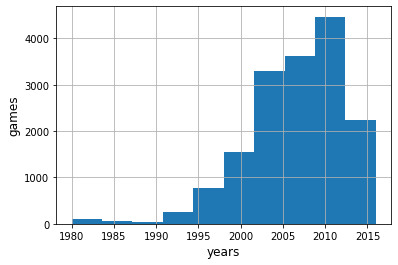

In [32]:
# distribution of games across release years
games_data['year_of_release'].hist()
plt.xlabel('years', fontsize = 12)
plt.ylabel('games', fontsize = 12)
plt.show()

From the graph above, majority of the games represented in the data were released between 2010 and 2011, The least represent year is in the range of 1988 and 1990

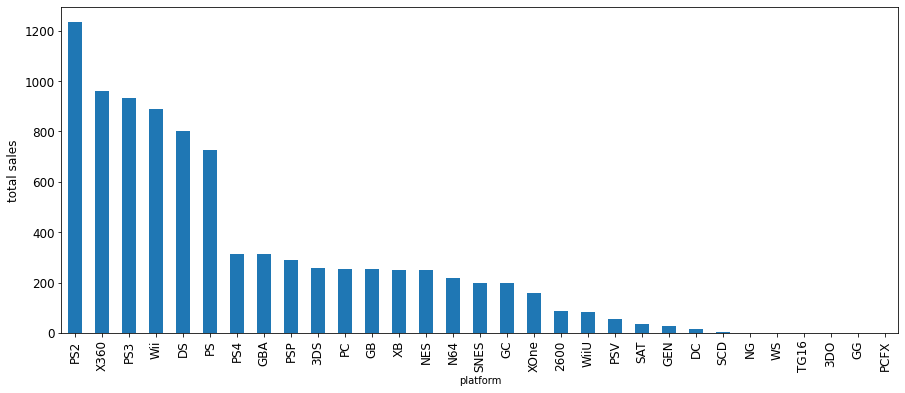

In [33]:
# bar chart of total sales per platform
grouped_data = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
grouped_data.plot(kind = 'bar', figsize = (15,6), fontsize = 12)
plt.ylabel('total sales', fontsize = 12)
plt.show()

Above, we see the distribution of platforms by total sales, PS2 recording the highest value in sales and the platforms on the right end spectrum with the lowest or non-recorded total sales.

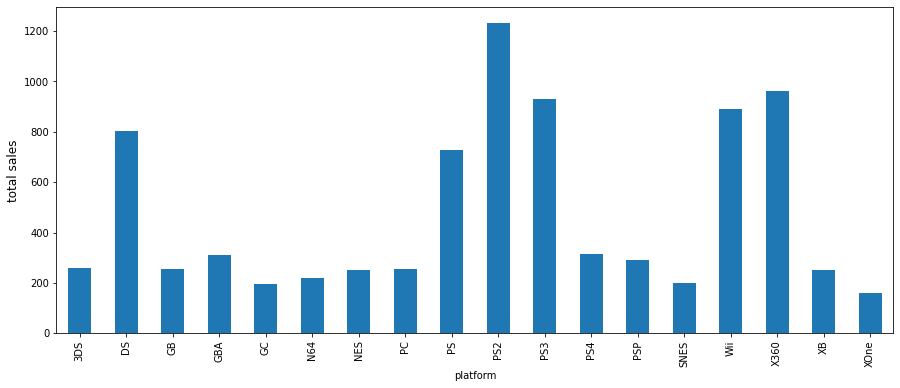

In [34]:
# graph of platforms with over 100 Million USD in total sales
groupa = games_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
groupa.query("total_sales > 100").plot(kind = 'bar', figsize = (15,6), legend = False)
plt.ylabel('total sales', fontsize = 12)
plt.show()

Here we have a closer look at the platforms with the highest recorded total sales, above 100 million USD, Platform PS2 has the highest value of overall sales with over 1.2 billion USD

Let's have an even closer look at the most profitable platforms

In [35]:
# most profitable platforms
top_platforms = groupa.query("total_sales > 850").index
top_platforms

Index(['PS2', 'PS3', 'Wii', 'X360'], dtype='object', name='platform')

Here, we have 4 most profitable platforms derived from our query of platforms with total sales exceeding 850 Million USD

We can then filter `'games_data'` dataframe to feature rows with the most profitable platforms

In [36]:
# filter top platforms from games_data dataframe
filter_platform = games_data.query("platform in @top_platforms")
filter_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16418,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66,11.0,unknown,0.01
16420,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,68,11.0,unknown,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69,11.0,unknown,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68,11.0,unknown,0.01


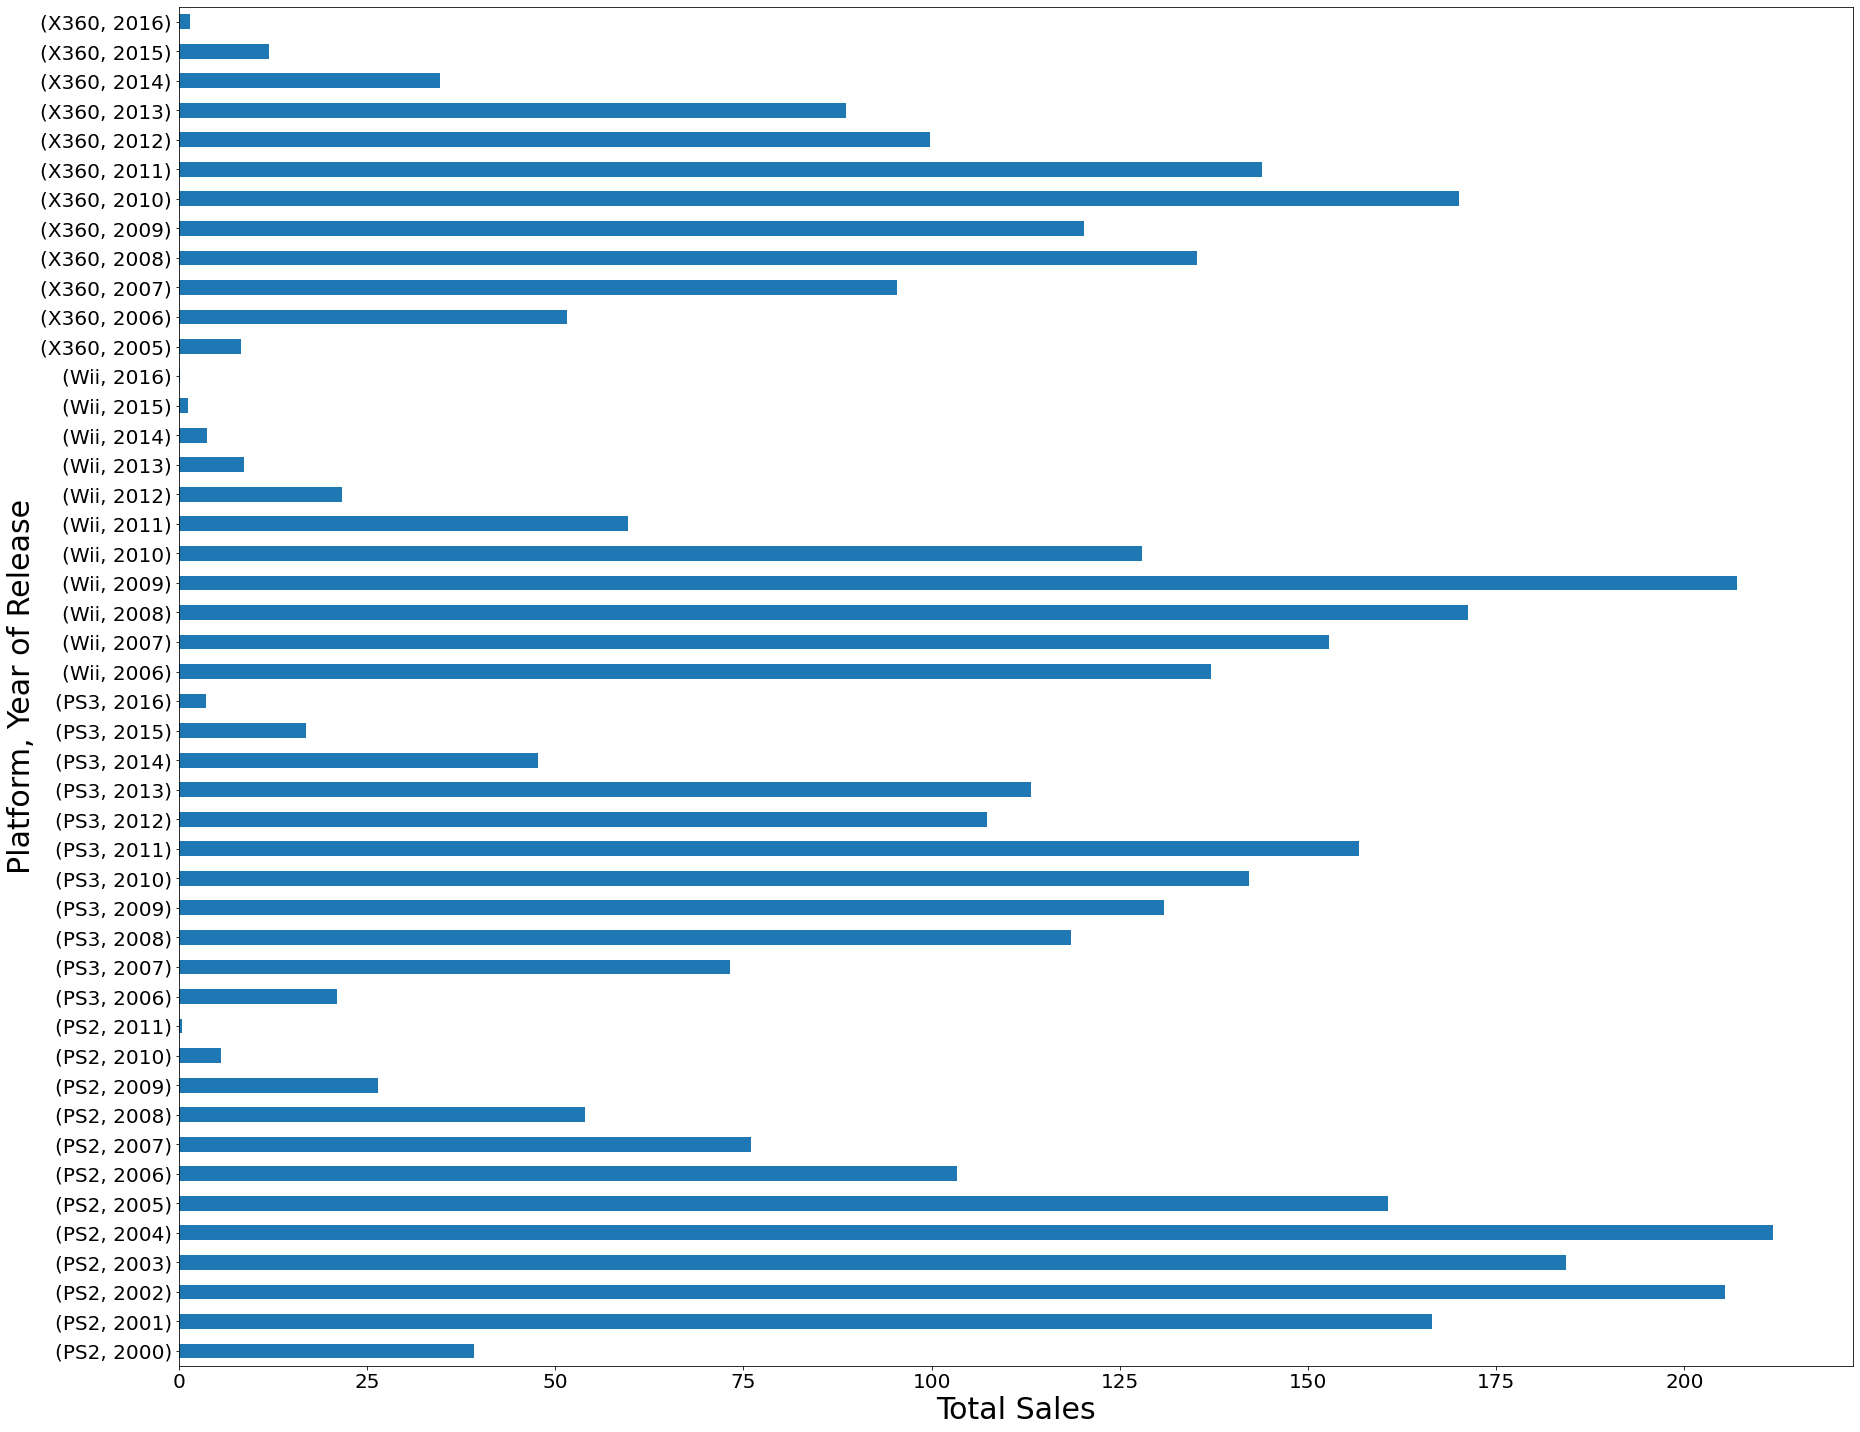

In [37]:
# pivot table and graph showing total sales of platforms in their release year
groupb = filter_platform.pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')
groupb.plot(kind = 'barh', figsize = (30,25), fontsize = 20, legend = False)
plt.xlabel('Total Sales', fontsize = 30)
plt.ylabel('Platform, Year of Release', fontsize = 30)
plt.show()

The chart above shows the total sales of each top platform per year. The total sales of PS2 games in 2004 is the highest value recorded worth over 220 million USD with Wii game sales in 2009 coming a close second. The individual graphs of each platform shows a normal distribution. The values look to be oon a steady rise with a peak in the middle year and a steady decline as the years go by.

For Wii platform, 2006 was the first recorded year in the data for games released by the platform and had total sales close to 140 million USD. By 2016, there were close to no sales for the platform.

Similarly with PS2 platform, the first recorded year, 2000, had total sales of about 40 million USD but by 2011, very few sales were recorded for the platform.

From what we can see, there is a 10-year period within which a platform grows on a steady incline, hits a peak and then a steady decline in sales till it hits 0 or close to at the end of range. New platforms typically appear 5 to 6 years from peak of an older platform as evidenced with data from the PS2 graph. 

In [38]:
# filter common years among platform for analysis
filter_year = filter_platform.query("2006 <= year_of_release <= 2011")

Let us use years common to the represented top platforms to better analyze and understand the similarities or differences between them

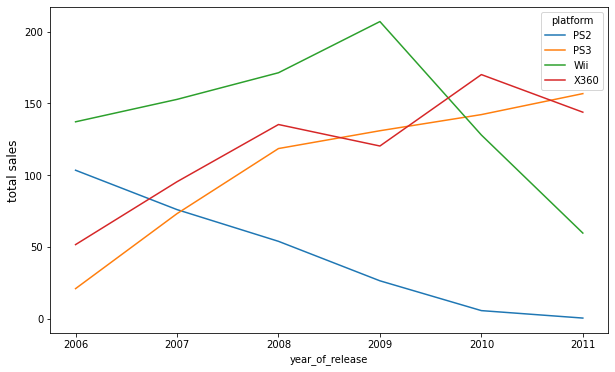

In [39]:
# graph of total sales of platforms per year recorded
groupc = filter_year.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
groupc.plot(figsize = (10,6))
plt.ylabel('total sales', fontsize = 12)
plt.show()

From the above figure, sales for X360 and PS3 start with a steady positive incline. By 2008, X360 sales reach a peak but then decline by 2009, the same pattern follows the proceeding years. 

For PS2, the graph shows a downward slope of sales from its peak in 2006 till 2011. 

Wii game sales had a much higher start at the top with close to 150 million USD in sales at 2006, it then reached a peak at 2009 before its steady decline till 2011.

### Plot Boxplot

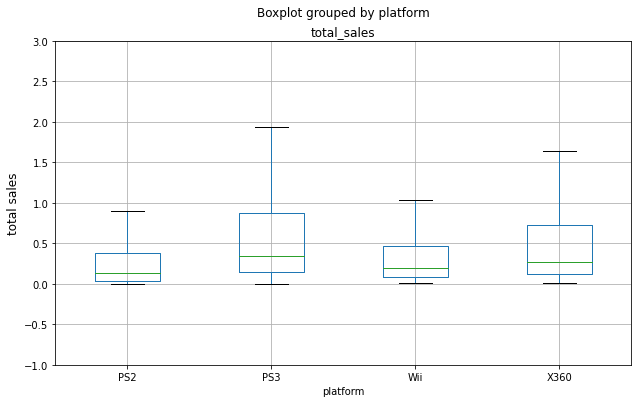

In [40]:
# boxplot of total sales per platforms
filter_year.boxplot(column = 'total_sales',by = 'platform',figsize = (10, 6), showfliers = False)
plt.ylim(-1, 3)
plt.ylabel('total sales', fontsize = 12)
plt.show()

The boxplot above shows the statistics of total sales by platform. PS3 has a higher value for sales than any other platform represented.

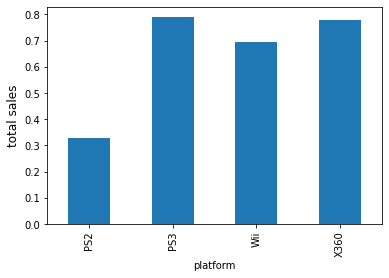

In [41]:
# bar chart of total sales per platform
filter_year.pivot_table(index = 'platform', values = 'total_sales').plot(kind = 'bar', legend = False)
plt.ylabel('total sales', fontsize = 12)
plt.show()

In the chart above, the most profitable platform represented in the dataframe is PS3

Let us filter by PS3 to gain more insight into data on the platform

In [42]:
# filter by type and actual user scores
PS3_type = filter_year[(filter_year['platform'] == 'PS3') &(filter_year['user_score'] < 11.0)]

In [43]:
# correlation matrix for SUV type against columns
PS3_type[['critic_score', 'user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.658025,0.481596
user_score,0.658025,1.000000,0.219025
total_sales,0.481596,0.219025,1.000000


From the matrix above, critic score and user score both positively affect total sales, more so critic scores. As the ratings increase, the sales of games increase in return

### Plot Scatterplot Graphs

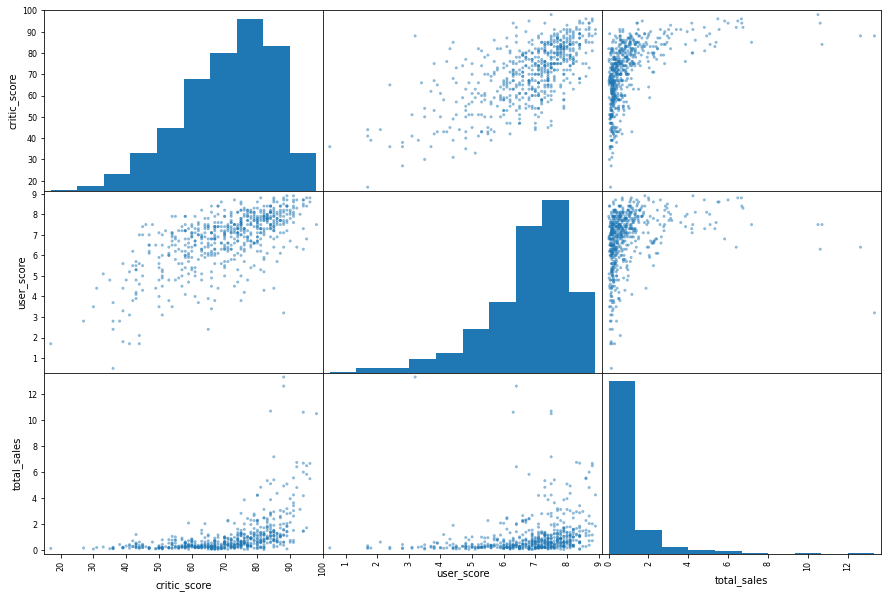

In [44]:
# scatterplot matrix for SUv type
pd.plotting.scatter_matrix(PS3_type[['critic_score', 'user_score','total_sales']], figsize = (15, 10))
plt.show()

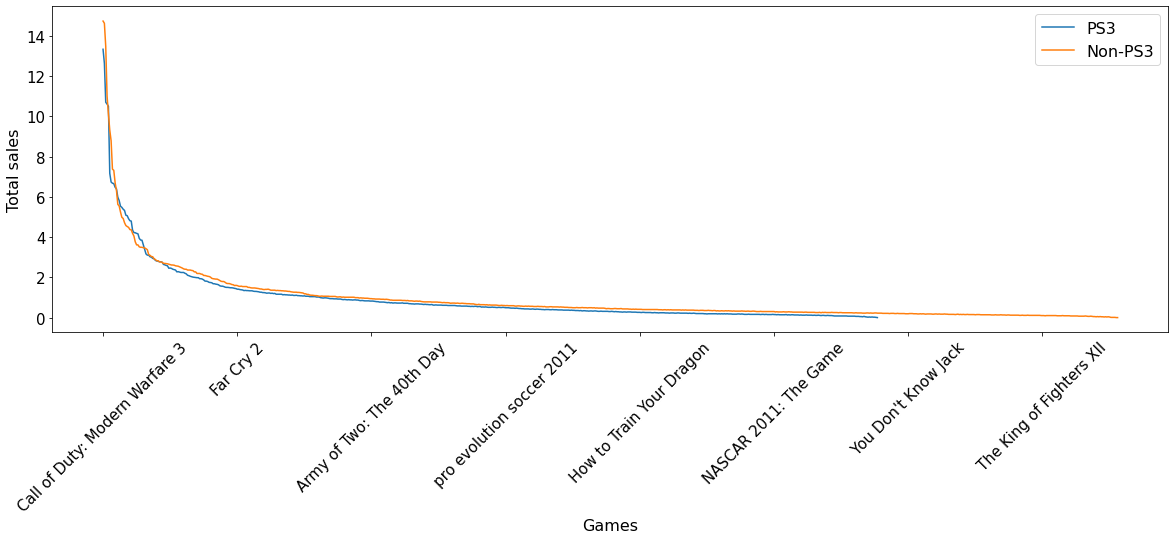

In [45]:
# graph of PS3 sales versus other platform sales for common games
pop_games = filter_year.query("name in @PS3_type.name")
ax = PS3_type.plot(x = 'name', y = 'total_sales', figsize  = (20,6), label = 'PS3')
pop_games.query("'PS3' not in platform").plot(x = 'name', y = 'total_sales', figsize  = (20,6), fontsize = 15,label = 'Non-PS3',ax = ax)
plt.xticks(rotation = 45)
plt.xlabel('Games', fontsize = 16)
plt.ylabel('Total sales', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Sales for 'Call of Duty: Modern Warfare 3' is higher than sales for other games as shown above. The plots show similar sales between PS3 and non-PS3 games.

In [46]:
# count of games per genre
filter_year['genre'].value_counts()

Action          753
Sports          690
Misc            577
Shooter         338
Racing          284
Adventure       282
Role-Playing    216
Fighting        195
Simulation      159
Platform        122
Strategy         90
Puzzle           66
Name: genre, dtype: int64

Action games are represented the most in the dataset with Puzzle games as the least represented

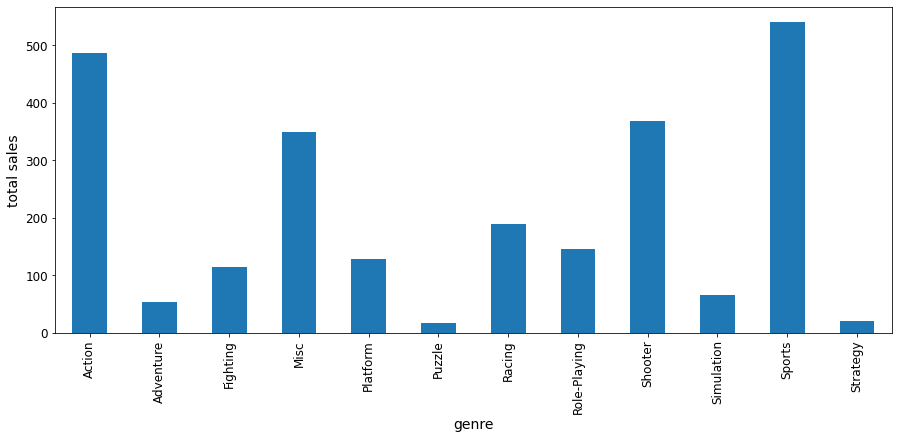

In [47]:
# sales per genre
sales_by_genre = filter_year.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
sales_by_genre.plot(kind = 'bar', figsize = (15,6), fontsize = 12, legend = False)
plt.ylabel('total sales', fontsize = 14)
plt.xlabel('genre',fontsize = 14)
plt.show()

As shown above, Sports games are the most profitable genre as opposed to Puzzle and Strategy games. A close second is sales of games in the Action genre

### User profiles for regions

User profile for games with high sales in NA region

In [48]:
# statistics of dataframe
games_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,69.689005,9.241961,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,9.943083,2.177133,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,67.000000,7.600000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,70.000000,11.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,75.000000,11.000000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,11.000000,82.540000


Let's us filter region data based on game sales of over 1 million USD

In [49]:
# high sales in NA region
NA_region = games_data.query("na_sales > 1")
len(NA_region)

893

In [50]:
# top platforms in region
NA_region['platform'].value_counts().head()

PS2     144
X360    129
PS       87
PS3      84
Wii      75
Name: platform, dtype: int64

These are the platforms with the most sales in the NA region

User profile for games with high sales in EU region

In [51]:
# high sales in EU region
EU_region = games_data.query("eu_sales > 1")
len(EU_region)

468

In [52]:
# top platform in region
EU_region['platform'].value_counts().head()

PS2     78
PS3     68
X360    51
PS      50
Wii     42
Name: platform, dtype: int64

As seen from the NA region, the top platforms are the same with PS2 sales higher than other platforms

User profile for games with high sales in JP region

In [53]:
# high sales in JP region
JP_region = games_data.query("jp_sales > 1")
len(JP_region)

239

In [54]:
# top platforms in region
JP_region['platform'].value_counts().head()

NES     39
DS      37
PS      29
SNES    29
GB      24
Name: platform, dtype: int64

Unlike NA and EU regions, the top platforms in the JP region are different with the exception of PS platform

Below is a graph showing the distribution of sales of the different regions

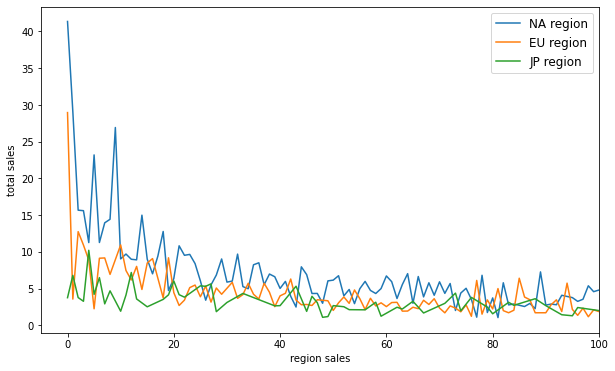

In [55]:
# graph of sales in the regions
NA_region['na_sales'].plot(figsize = (10,6))
EU_region['eu_sales'].plot()
JP_region['jp_sales'].plot()
plt.xlim(-5, 100)
plt.legend(['NA region', 'EU region', 'JP region'], fontsize = 12)
plt.xlabel('region sales')
plt.ylabel('total sales')
plt.show()

Per the graph, sales in the NA region are higher than sales in the JP region with sales in the EU region hovering in the middle of the two

Moving on to analyze the top selling game genres in each region

In [56]:
# top selling game genres in NA region
NA_region.groupby('genre')['na_sales'].sum().sort_values(ascending = False)

genre
Action          370.58
Shooter         359.87
Sports          289.02
Platform        284.73
Misc            181.41
Role-Playing    172.67
Racing          164.51
Fighting        101.51
Puzzle           61.47
Simulation       61.40
Strategy         26.72
Adventure        24.98
Name: na_sales, dtype: float64

In the NA region, the top selling game genre is the Action genre and the least is the Adventure genre

In [57]:
# top selling game genres in EU region
EU_region.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)

genre
Action          191.10
Sports          174.85
Shooter         148.61
Racing           96.09
Platform         94.94
Role-Playing     94.19
Misc             87.77
Simulation       48.17
Fighting         26.42
Puzzle           18.19
Adventure        13.73
Strategy         11.69
Name: eu_sales, dtype: float64

In the EU region, the top selling game genre is also the Action genre with the Sports genre as the second most profitable. The least being the Strategy genre

In [58]:
# top selling game genres in JP region
JP_region.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)

genre
Role-Playing    186.79
Platform         77.28
Sports           43.21
Misc             37.98
Action           29.48
Racing           28.22
Fighting         23.89
Simulation       23.62
Puzzle           23.42
Strategy          6.59
Adventure         5.36
Shooter           3.93
Name: jp_sales, dtype: float64

In the JP region, the top selling game genre is the Role-Playing genre. As opposed to the data for both NA and EU regions, games in the Shooter genre are the least profitable in the JP region

Statistics of the dataset

In [59]:
# statistics for dataframe
games_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ('mean','var','std'))

,mean,std,var
platform,,,
2600,0.745517,0.956160,0.914242
3DO,0.033333,0.023094,0.000533
3DS,0.503535,1.441271,2.077262
DC,0.306731,0.468660,0.219642
DS,0.378491,1.436042,2.062215
GB,2.622990,5.390925,29.062067
GBA,0.385795,0.899654,0.809377
GC,0.362970,0.693974,0.481601
GEN,1.050000,1.490041,2.220223


Now, we can determine if ESRB ratings affect sales in individual regions

In [60]:
# top game ratings per total sales in NA region
NA_region.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

rating
unknown    672.92
E          584.07
M          461.70
T          274.09
E10+       102.53
K-A          2.30
AO           1.26
Name: na_sales, dtype: float64

In [61]:
# top game ratings per total sales in EU region
EU_region.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

rating
E          351.98
M          240.39
unknown    238.55
T          130.65
E10+        44.18
Name: eu_sales, dtype: float64

In [62]:
# top game ratings per total sales in JP region
JP_region.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

rating
unknown    310.67
E          110.48
T           47.37
E10+        12.38
M            7.41
K-A          1.46
Name: jp_sales, dtype: float64

As seen above, there is a large group of high grossing games with unknown ratings in each region, mostly seen in both the NA and JP regions. For games represented in the JP region, over 60% of them have unknown ratings. For each of the regions above, games with ratings of 'E' are among the most profitable in the market compared to games rated 'E10+' and 'K-A'. This is plausible as games rated 'E' don't have any restrictions for players and are marketed to the general population. Thus, we can conclude that game ratings affect sales regardless of region.

## Testing the Hypotheses

We need to filter out user score values greater than the threshold of 10

In [63]:
# filter actual user scores per threshold of 10
user_rating = games_data.query("user_score < 11")
user_rating['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

### The average user ratings of the Xbox One and PC platforms are the same

In [64]:
# testing hypotheses
X1_rate = user_rating[user_rating['platform'] == 'XOne']['user_score']
PC_rate = user_rating[user_rating['platform'] == 'PC']['user_score']
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(X1_rate, PC_rate)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.3037979620149106e-05
We reject the null hypothesis


H0: The average user ratings of the Xbox One and PC platforms are the same

H1: The average user ratings of the Xbox One and PC platforms are different

### The average user ratings for the Action and Sports genres are different

In [65]:
# testing hypotheses
action_rate = user_rating[user_rating['genre'] == 'Action']['user_score']
sports_rate = user_rating[user_rating['genre'] == 'Sports']['user_score']
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(action_rate, sports_rate)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.06480928064420527
We can't reject the null hypothesis


Fail to reject H0: We don't have enough evidence to prove that the average user ratings for the Action and Sports genres are not equal

## General Conclusion

For this project, we analyzed the data to determine factors which positively influences the success of a game based on platform, genre, reviews, region and ratings.

We had to handle missing values in columns `'name'`,`'year_of_release'`,`'critic_score'`,`'user_score'`and`'rating'`. For the `'name'` and `'year_of_release'` columns, the missing information was linked to the GEN platform with 1993 as its release year. It is possible that information on the game and its genre would most likely be unknown or just not recorded as the data is old. For columns `'critic_score'`, `'user_score'` and `'rating'`, it is possible no data was found for these columns, especialy the columns for reviews as the information was never populated given the possibility that individuals lacked the interest to review the games. As for rating, there could have been multiple ratings or a general rating for the games such that no information was thought to be needed.

There is a 10-year period within which a platform grows on a steady incline, hits a peak and then a steady decline in sales till it hits 0 or close to at the end of range. Per the graphs plotted, ew platforms typically appear 5 to 6 years from peak of an older platform.

We chose the period of 2006 to 2011 as there was common data for the highest grossing platforms, for closer analysis. For this time period, sales of PS3 games were the highest compared to sales of PS2 games which have the highest sales recorded in general for the given dataset. Sales for 'Call of Duty: Modern Warfare 3', which is a common game among top platforms, is higher than sales for other common platform games. 

Sports games are the most profitable genre as opposed to Puzzle and Strategy games with Action games as a close second in the filtered data for 2006 to 2011. Also among the regions, NA, JP and EU, Action and Sports games are among the highest sold game genres, though in the JP region, Role-playing games took the lead.

Sales in the NA region are higher than sales in other regions, JP region having the least sales. For each of the regions, games with rating of 'E' are among the most profitable in the market compared to games rated 'K-A' or 'E10+', though games with unknown ratings had higher sales in both the NA and JP regions. This is plausible as games rated 'E' don't have any restrictions for players and are marketed to the general population. Thus, we can conclude that game ratings affect sales regardless of region

Regarding the hypotheses given, the average user ratings of the Xbox One and PC platforms are different and we don't have enough evidence to prove that the average user ratings for the Action and Sports genres are not equal.

In conclusion, PS2 platform is the most profitable game platform and games in the Sports and Action genre are the most profitable game genres. NA region has the highest recorded total sales. Critic score and User score positively influence sales of games and games with ratings of 'E', other than unknown, are among the most profitable rated games.
